# Lab 4

Morphology is a broad set of image processing operations that process images based on shapes. Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.

In [121]:
import cv2
import numpy as np

In [122]:
file_path = './output/object_foto2.png'

image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
image = (image > 127).astype(np.uint8)

print(image.shape)


(980, 800)


In [123]:
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)

# array([[0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0]], dtype=uint8)

In [124]:
def function(image, k):
    height, width = image.shape
    k_height, k_width = k.shape
    pad_h, pad_w = k_height // 2, k_width // 2
    
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    result = np.zeros_like(image)
    return height, width, padded_image, result, k_height, k_width

### Erosion

Erosion is used to ***remove pixels*** from the boundary of the input image shrinking the object.

Erosion operator takes two inputs, one is the image and the other one is the structuring element. The structuring element determines the effect of erosion on the input image.



In [125]:
def erosion(image, k):
    
    height, width, padded_image, result, k_height, k_width = function(image, k)

    for i in range(height):
        for j in range(width):
            l = padded_image[i:i + k_height, j:j + k_width]
            
            if np.all(l[k == 1] == 1):  
                result[i, j] = 1
    
    return result

In [126]:
erosion_img = erosion(image, kernel)
cv2.imwrite('./lab_4_foto/erosion_img.png', erosion_img  )

True

## Dilation

Dilation is used to ***add pixels*** to the boundary of the input image making the object more visible and fill small voids in the image.

Dilation operator takes two inputs, one is the image and the other one is the structuring element. The structuring element determines the effect of dilation on the input image.

Dilation of Binary Image- In a binary image, a pixel is set to 1 if any of the neighbouring pixels have the value 1.

In [127]:
def dilation(image, k):

    height, width, padded_image, result, k_height, k_width = function(image, k)

    for i in range(height):
        for j in range(width):
            
            l = padded_image[i:i + k_height, j:j + k_width]
            
            if np.any(l[kernel == 1] > 0): 
                result[i, j] = 1
    
    return result

In [128]:
dilation_img = dilation(image, kernel)
cv2.imwrite('./lab_4_foto/dilation_img.png', dilation_img*255)

True

## Opening and Closing


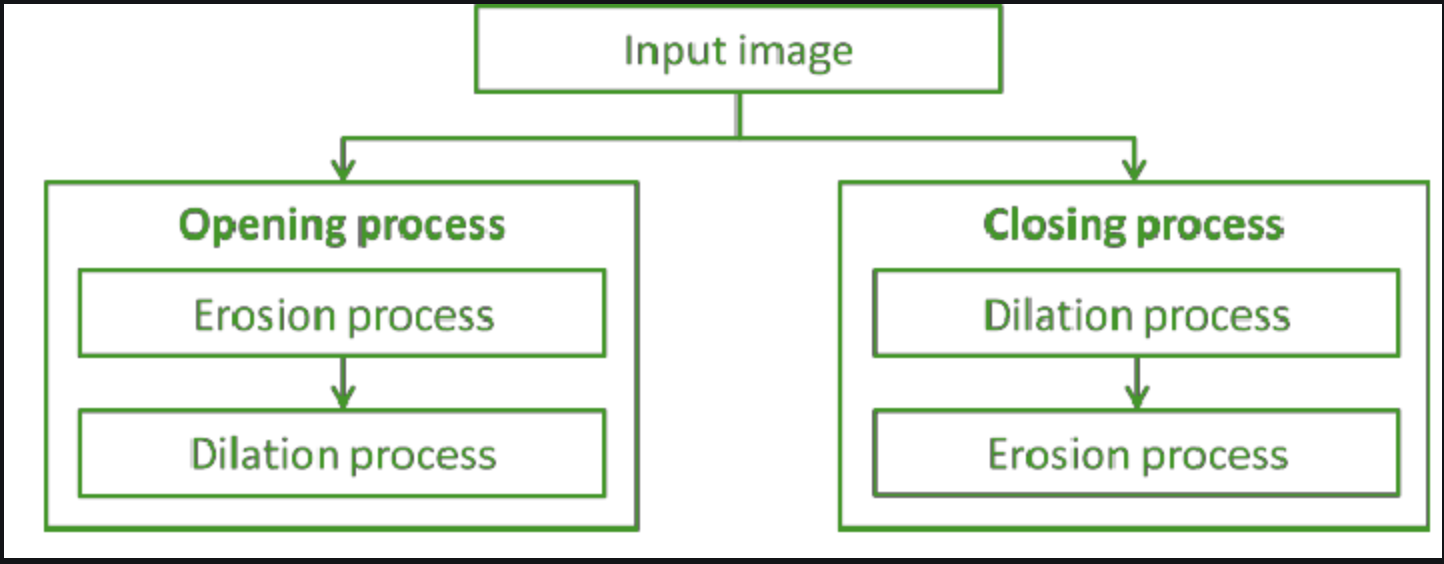

Opening is used for smoothening of contour and fusing of narrow breaks.

Closing is used for removing internal noise of the obtained image

In [129]:
def opening(image, kernel):
    step_1 = erosion(image, kernel)
    return dilation(step_1, kernel) 

def closing(image, kernel):
    step_1 = dilation(image, kernel)
    return erosion(step_1, kernel)

In [130]:
opening_img = opening(image, kernel)
cv2.imwrite('./lab_4_foto/opening_img.png', opening_img*255)

closing_img = closing(image, kernel)
cv2.imwrite('./lab_4_foto/closing_img.png', closing_img*255)

images =  np.hstack((opening_img*255, closing_img*255))
cv2.imshow('differense between opened foto and closed foto', images)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Boundaries



The inner boundary may be defined as the foreground pixels that are adjacent to background pixels. We can determine the inner boundary by

- Duplicating the binary image

- Eroding with a 3×3 structuring element

- Subtracting the eroded image from the original

The outer boundary may be defined as the background pixels that are adjacent to foreground pixels. We can determine the outer boundary by

- Duplicating the binary image

- Dilating with a 3×3 structuring element

- Subtracting the original image from the dilated image

In [131]:
def boundaries(image, kernel):
    erosion_img = erosion(image, kernel)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] == 1 and erosion_img[i, j] == 0:
                result[i, j] = 1 

    return result

In [132]:
boundaries_img = boundaries(image, kernel)
cv2.imwrite('./lab_4_foto/boundaries_img.png', boundaries_img*255)

True